# Kaggle competition: WiDS 2020

## Objective

**The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival. MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.**

## Proposed solution
- Visualizing features
  - Imbalaced dataset
- Leading with missing values on dataset
- Correlated features
- Filling missing values
- Categorical values
- Model for classification: Catboost
- Prediction

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import xgboost
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
pd.set_option('max_rows', 300)
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', 300)
np.random.seed(566)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Load train/test data
### Data Description 
MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.

The data includes:

**Training data** for 91,713 encounters.  
**Unlabeled test data** for 39,308 encounters, which includes all the information in the training data except for the values for hospital_death.  
**WiDS Datathon 2020 Dictionary** with supplemental information about the data, including the category (e.g., identifier, demographic, vitals), unit of measure, data type (e.g., numeric, binary), description, and examples.  
**Sample submission files**

In [2]:
# labels
TARGET_COL = "hospital_death"

In [3]:
df = pd.read_csv("training_v2.csv")
print(df.shape)
display(df.nunique())
df.head()

(91713, 186)


encounter_id                     91713
patient_id                       91713
hospital_id                      147  
hospital_death                   2    
age                              74   
bmi                              34888
elective_surgery                 2    
ethnicity                        6    
gender                           2    
height                           401  
hospital_admit_source            15   
icu_admit_source                 5    
icu_id                           241  
icu_stay_type                    3    
icu_type                         8    
pre_icu_los_days                 9757 
readmission_status               1    
weight                           3409 
albumin_apache                   35   
apache_2_diagnosis               44   
apache_3j_diagnosis              399  
apache_post_operative            2    
arf_apache                       2    
bilirubin_apache                 362  
bun_apache                       476  
creatinine_apache        

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.00,22.73,0,Caucasian,M,180.30,Floor,Floor,92,admit,CTICU,0.54,0,73.90,2.30,113.00,502.01,0,0.00,0.40,31.00,2.51,nan,3.00,6.00,0.00,4.00,168.00,118.00,27.40,0.00,40.00,nan,nan,nan,nan,36.00,134.00,39.30,nan,0.00,14.10,46.00,32.00,68.00,37.00,68.00,37.00,119.00,72.00,66.00,40.00,89.00,46.00,89.00,46.00,34.00,10.00,100.00,74.00,122.00,64.00,131.00,73.00,131.00,73.00,39.90,37.20,nan,nan,68.00,63.00,68.00,63.00,119.00,108.00,nan,nan,86.00,85.00,86.00,85.00,26.00,18.00,100.00,74.00,nan,nan,131.00,115.00,131.00,115.00,39.50,37.50,2.30,2.30,0.40,0.40,31.00,30.00,8.50,7.40,2.51,2.23,168.00,109.00,19.00,15.00,8.90,8.90,27.40,27.40,nan,nan,1.30,1.00,233.00,233.00,4.00,3.40,136.00,134.00,14.10,14.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Sepsis,Cardiovascular
1,114252

## Visualizing features

In [4]:
import seaborn as sns

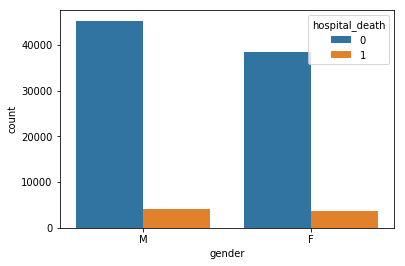

In [5]:
sns.countplot(data=df, x='gender', hue='hospital_death')

In [6]:
df['hospital_death'].value_counts()

0    83798
1    7915 
Name: hospital_death, dtype: int64

## Missing values on training data

In [7]:
df.isna().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
ethnicity                        1395 
gender                           25   
height                           1334 
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [8]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,"91,713.00","91,713.00","91,713.00","91,713.00","87,485.00","88,284.00","91,713.00","90,379.00","91,713.00","91,713.00","91,713.00","88,993.00","37,334.00","90,051.00","90,612.00","91,713.00","90,998.00","33,579.00","72,451.00","72,860.00","20,845.00","89,812.00","89,812.00","90,676.00","89,812.00","80,677.00","90,835.00","71,835.00","90,998.00","90,719.00","20,845.00","20,845.00","20,845.00","20,845.00","90,479.00","73,113.00","87,605.00","42,715.00","90,998.00","69,701.00","23,729.00","23,729.00","91,548.00","91,548.00","90,673.00","90,673.00","91,568.00","91,568.00","23,936.00","23,936.00","91,493.00","91,493.00","90,234.00","90,234.00","91,328.00","91,328.00","91,380.00","91,380.00","23,754.00","23,754.00","91,554.00","91,554.00","90,686.00","90,686.00","89,389.00","89,389.00","16,785.00","16,785.00","88,094.00","88,094.00","84,363.00","84,363.00","88,923.00","88,923.00","16,869.00","16,869.00","87,074.00","87,074.00","82,629.00","82,629.00","87,356.00","87,356.00","87,528.00","87,528.00","16,798.00","16,798.00","88,102.00","88,102.00","84,372.00","84,372.00","69,981.00","69,98

Test data

In [9]:
test = pd.read_csv("unlabeled.csv")
print(test.shape)
display(test.nunique())
test.head()

(39308, 186)


encounter_id                     39308
patient_id                       39308
hospital_id                      66   
hospital_death                   0    
age                              74   
bmi                              19327
elective_surgery                 2    
ethnicity                        6    
gender                           2    
height                           318  
hospital_admit_source            14   
icu_admit_source                 5    
icu_id                           99   
icu_stay_type                    3    
icu_type                         8    
pre_icu_los_days                 5921 
readmission_status               1    
weight                           1911 
albumin_apache                   36   
apache_2_diagnosis               44   
apache_3j_diagnosis              383  
apache_post_operative            2    
arf_apache                       2    
bilirubin_apache                 490  
bun_apache                       124  
creatinine_apache        

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,nan,56.00,21.10,0,Caucasian,M,180.30,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.10,0,68.60,3.70,301.00,405.01,0,0.00,nan,19.00,0.67,nan,2.00,5.00,0.00,1.00,276.00,105.00,42.00,0.00,57.00,nan,nan,nan,nan,5.00,134.00,36.60,"1,121.13",0.00,4.70,nan,nan,74.00,51.00,74.00,51.00,100.00,78.00,nan,nan,86.00,60.00,86.00,60.00,20.00,8.00,100.00,96.00,nan,nan,121.00,79.00,121.00,79.00,37.10,36.60,nan,nan,55.00,51.00,55.00,51.00,88.00,84.00,nan,nan,68.00,60.00,68.00,60.00,18.00,8.00,100.00,98.00,nan,nan,91.00,79.00,91.00,79.00,36.60,36.60,3.70,3.70,nan,nan,19.00,19.00,9.30,9.30,0.67,0.67,276.00,167.00,24.00,24.00,13.80,13.80,42.00,42.00,nan,nan,nan,nan,223.00,223.00,4.80,4.80,135.00,134.00,4.70,4.70,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.13,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Neurological,Neuro

In [10]:
test.isna().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   39308
age                              1654 
bmi                              1086 
elective_surgery                 0    
ethnicity                        171  
gender                           15   
height                           750  
hospital_admit_source            11948
icu_admit_source                 115  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           764  
albumin_apache                   24650
apache_2_diagnosis               896  
apache_3j_diagnosis              637  
apache_post_operative            0    
arf_apache                       179  
bilirubin_apache                 25292
bun_apache                       7016 
creatinine_apache        

## Handling missing values

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [12]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,nan,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.02,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
patient_id,0.01,1.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.

In [13]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(to_drop)
print('There are %d columns to remove.' % (len(to_drop)))
#Drop the columns with high correlations
df = df.drop(columns = to_drop)


['apache_post_operative', 'paco2_for_ph_apache', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_min', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1

In [14]:
test = test.drop(columns = to_drop)

In [15]:
df.isna().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
ethnicity                        1395 
gender                           25   
height                           1334 
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache                18853
fio2_apache              

Columns with missing values upper of 75%

In [16]:
# Train missing values (in percent)
train_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
train_missing.head()
train_missing = train_missing.index[train_missing > 0.75]

In [17]:
train_missing

Index(['h1_albumin_max', 'h1_pao2fio2ratio_max', 'h1_arterial_ph_max', 'h1_arterial_po2_min', 'h1_arterial_po2_max', 'h1_calcium_max', 'h1_diasbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sodium_max', 'h1_potassium_max', 'ph_apache', 'fio2_apache', 'paco2_apache', 'pao2_apache'], dtype='object')

In [18]:
print('There are %d columns with more than 75%% missing values' % len(train_missing))
df = df.drop(columns = train_missing)

There are 18 columns with more than 75% missing values


In [19]:
test = test.drop(columns = train_missing)

Number of columns (features)

In [20]:
len(df.columns)

109

## Filling missing values

In [21]:
impute_df = df[['age', 'bmi', 'height']]

In [22]:
mean_age = impute_df['age'].mean()
mean_age

62.309515917014345

In [23]:
median_bmi = impute_df['bmi'].median()

In [24]:
median_bmi

27.65465458

In [25]:
mean_height = impute_df['height'].mean()
mean_height

169.64158786886333

In [26]:
df['age'] = df['age'].fillna(mean_age)
df['height'] = df['height'].fillna(mean_height)
df['bmi'] = df['bmi'].fillna(median_bmi)

In [27]:
test['age'] = test['age'].fillna(mean_age)
test['height'] = test['height'].fillna(mean_height)
test['bmi'] = test['bmi'].fillna(median_bmi)

In [28]:
fill_df = df[['gender','ethnicity']]
fill_df.isna().sum()

gender       25  
ethnicity    1395
dtype: int64

In [29]:
df['gender'] = df['gender'].fillna(method='bfill')
df['ethnicity'] = df['ethnicity'].fillna(method='ffill')
# same transformation for test data
test['gender'] = test['gender'].fillna(method='bfill')
test['ethnicity'] = test['ethnicity'].fillna(method='ffill')

df.isna().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              0    
bmi                              0    
elective_surgery                 0    
ethnicity                        0    
gender                           0    
height                           0    
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache          

* `encounter_id ,	patient_id	` are unique. We could probably drop, but there may be leaks from them so we'll keep (And we need them for the submission)
* Their being unique means they are not candidates for generating historical features from them per patient. 
    * We could try the hospital ID or surgery type or apache codes for that purpose

### if using cartboost or lgbm, we can define categorical variables

* catboost hyperparam tuning : https://colab.research.google.com/github/catboost/tutorials/blob/master/python_tutorial.ipynb#scrollTo=nSteluuu_mif


* We see that many clearly continous numeric variables have relatively low cardinality (e.g. icu sensor readings) - making it tricky to define them automatically. 
* Categorical columns are not necessarily string columns, could be numerical - e.g. hospital codes.. 


In [30]:
print([c for c in df.columns if 7<df[c].nunique()<800])
## 
# categorical_cols = ['hospital_id','apache_3j_bodysystem', 'apache_2_bodysystem',
# "hospital_admit_source","icu_id","ethnicity"]

['hospital_id', 'age', 'height', 'hospital_admit_source', 'icu_id', 'icu_type', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bilirubin_apache', 'bun_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_temp_max', 'h1_temp_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd

In [31]:
## print non numeric columns : We may need to
## define them as categorical / encode as numeric with label encoder, depending on ml model used
print([c for c in df.columns if (1<df[c].nunique()) & (df[c].dtype != np.number)& (df[c].dtype != int) ])

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [32]:
categorical_cols =  ['hospital_id',
 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

#['apache_3j_bodysystem', 'apache_2_bodysystem',
# "hospital_admit_source","icu_id","ethnicity"]

## Build & Tune catboost/GBM models
* We could make a validation subset for early stopping - allowing us to more easily tune our models hyperparameters
*  we can go with a defualt model for now - it gets good results ,as we'll see

* We can run on the GPU, giving a speed boost - to do this modify the kaggle kernel to use the GPU, and in the `fit` parameters set `task_type = "GPU"`

* Catboost and lgbm have `Pool`/`Dataset` objects, that can be used "internally" by them for some functions, e.g. to efficienctly CV



In [33]:
display(df[categorical_cols].dtypes)
display(df[categorical_cols].tail(3))
display(df[categorical_cols].isna().sum())

hospital_id              int64 
ethnicity                object
gender                   object
hospital_admit_source    object
icu_admit_source         object
icu_stay_type            object
icu_type                 object
apache_3j_bodysystem     object
apache_2_bodysystem      object
dtype: object

,hospital_id,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
91710,195,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,66,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
91712,104,Caucasian,F,NaN,Operating Room / Recovery,admit,Med-Surg ICU,Gastrointestinal,Gastrointestinal


hospital_id              0    
ethnicity                0    
gender                   0    
hospital_admit_source    21409
icu_admit_source         112  
icu_stay_type            0    
icu_type                 0    
apache_3j_bodysystem     1662 
apache_2_bodysystem      1662 
dtype: int64

* We Fill in empty string for missing  values in the string columns , otherwise catboost will give an error - "CatBoostError: Invalid type for cat_feature: cat_features must be integer or string, real number values and NaN values should be converted to string."


In [34]:
df[categorical_cols] = df[categorical_cols].fillna("")

# same transformation for test data
test[categorical_cols] = test[categorical_cols].fillna("")

df[categorical_cols].isna().sum()

hospital_id              0
ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [36]:
df.isna().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
hospital_death                   0    
age                              0    
bmi                              0    
elective_surgery                 0    
ethnicity                        0    
gender                           0    
height                           0    
hospital_admit_source            0    
icu_admit_source                 0    
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache          

In [37]:
len(df.columns)

109

In [39]:
df['apache_3j_bodysystem'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal        9026 
Metabolic               7650 
Trauma                  3842 
Genitourinary           2172 
                        1662 
Musculoskeletal/Skin    1166 
Hematological           638  
Gynecological           313  
Name: apache_3j_bodysystem, dtype: int64

## Train model(s)

In [42]:
## useful "hidden" function - df._get_numeric_data()  - returns only numeric columns from a pandas dataframe. Useful for scikit learn models! 

X_train = df.drop([TARGET_COL],axis=1)
y_train = df[TARGET_COL]

In [ ]:
## catBoost Pool object
train_pool = Pool(data=X_train,label = y_train,cat_features=categorical_cols,
#                   baseline= X_train[""], ## 
#                   group_id = X_train['hospital_id']
                 )

### OPT/TODO:  do train test split for early stopping then add that as an eval pool object : 

## Train a basic model

In [ ]:
model_basic = CatBoostClassifier(verbose=False,iterations=50)#,learning_rate=0.1, task_type="GPU",)
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

### Hyperparameter search
* We can do a gridsearch for best hyperparameters, such as learning rate, etc' 
     * Another improvement: split evaluation set from train , and use it for early stopping + tun
      * I leave this to the reader :)  

In [ ]:
### hyperparameter tuning example grid for catboost : 
grid = {'learning_rate': [0.04, 0.1],
        'depth': [7, 11],
#         'l2_leaf_reg': [1, 3,9],
#        "iterations": [500],
       "custom_metric":['Logloss', 'AUC']}

model = CatBoostClassifier()

## can also do randomized search - more efficient typically, especially for large search space - `randomized_search`
grid_search_result = model.grid_search(grid, 
                                       train_pool,
                                       plot=True,
                                       refit = True, #  refit best model on all data
                                      partition_random_seed=42)

print(model.get_best_score())

In [ ]:
print("best model params: \n",grid_search_result["params"])

## Features importances

* What are the most important features for predicting death? 

* We also look also at Shapley values : https://github.com/slundberg/shap
    * Shap + Catboost tutorial :  https://github.com/slundberg/shap/blob/master/notebooks/tree_explainer/Catboost%20tutorial.ipynb
      


In [ ]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    if score > 0.05:
        print('{0}: {1:.2f}'.format(name, score))

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_pool)

# visualize the training set predictions
# SHAP plots for all the data is very slow, so we'll only do it for a sample. Taking the head instead of a random sample is dangerous! 
shap.force_plot(explainer.expected_value,shap_values[0,:400], X_train.iloc[0,:400])

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

* As we would expect, age is important. 
* The top features are precalculated predictors of risk of death (which likely take age into account). 

* We see that there's a difference between hospitals , although it's not an especially clear or linear feature. One explanation may be differences in skill of departments/doctors inside each hospital, with these "latent"/hidden variables interacting with other factors in our dataset

# Get predictions on test set and export for submission

* You can "ensemble"/average the predictions from the 2 catboost models as a quick improvement , even if there isn't much diversity added

In [ ]:
test[TARGET_COL] = model.predict(test.drop([TARGET_COL],axis=1),prediction_type='Probability')[:,1]

In [ ]:
test[["encounter_id","hospital_death"]].to_csv("submission.csv",index=False)